<!-- dom:TITLE: PHY321: Two-body problems, gravitational forces, scattering and begin Lagrangian formalism -->
# PHY321: Two-body problems, gravitational forces, scattering and begin Lagrangian formalism
<!-- dom:AUTHOR: [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/) at Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA & Department of Physics, University of Oslo, Norway -->
<!-- Author: -->  
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **Mar 31, 2021**

Copyright 1999-2021, [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/). Released under CC Attribution-NonCommercial 4.0 license




## Aims and Overarching Motivation


### Monday

1. Physical interpretation of various orbit types and summary gravitational forces, examples on whiteboard and handwritten notes

2. Start discussion two-body scattering

**Reading suggestion**: Taylor chapter 8 and sections 14.1-14.2 and Lecture notes


### Wednesday

1. Two-body scattering

**Reading suggestion**: Taylor and sections 14.3-14.6 

### Friday

1. Lagrangian formalism

**Reading suggestion**: Taylor Sections 6.1-6.2


### Code example with gravitional force

The code example here is meant to illustrate how we can make a plot of
the final orbit. We solve the equations in polar coordinates (the
example here uses the minimum of the potential as initial value) and
then we transform back to cartesian coordinates and plot $x$ versus
$y$. We see that we get a perfect circle when we place ourselves at
the minimum of the potential energy, as expected.


## Plotting the potential first

The code here plots the effective potential

The following code plots this effective potential for a simple choice of parameters, with a standard gravitational potential $-\alpha/r$. Here we have chosen $L=m=\alpha=1$.

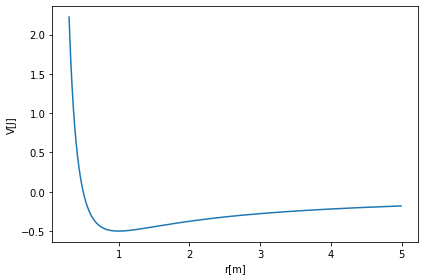

In [15]:
%matplotlib inline

# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.3
xfinal = 5.0
alpha = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = -alpha/x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

## Solving the differential equations, Radial Degrees of Freedom only

This code and the subsequent one are relevant for homework 9 (the numerical exercise).

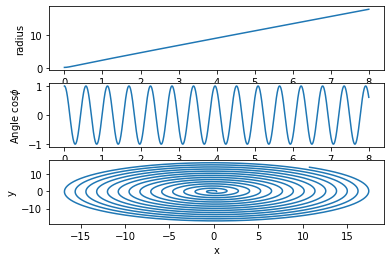

In [6]:

# Simple Gravitational Force   -alpha/r
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


    
DeltaT = 0.001
#set up arrays 
tfinal = 8.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
phi = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
alpha = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/alpha)
# Initial conditions, place yourself at the potential min
r0 = 0.3*rmin
v0 = 0.0  # starts at rest
r[0] = r0
v[0] = v0
phi[0] = 0.0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -alpha/(r[i]**2)+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -alpha/(r[i+1]**2)+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    phi[i+1] = t[i+1]*c2/(r0**2)
# Find cartesian coordinates for easy plot    
x = r*np.cos(phi)
y = r*np.sin(phi)
fig, ax = plt.subplots(3,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Angle $\cos{\phi}$')
ax[1].plot(t,np.cos(phi))
ax[2].set_ylabel('y')
ax[2].set_xlabel('x')
ax[2].plot(x,y)

save_fig("Phasespace")
plt.show()

## Changing initial conditions

Try to change the initial value for $r$ and see what kind of orbits you get.
In order to test different energies, it can be useful to look at the plot of the effective potential discussed above.

However, for orbits different from a circle the above code would need modifications in order to allow us to display say an ellipse. For the latter, it is much easier to run our code in cartesian coordinates, as done here. In this code we test also energy conservation and see that it is conserved to numerical precision. The code here is a simple extension of the code we developed for homework 4.

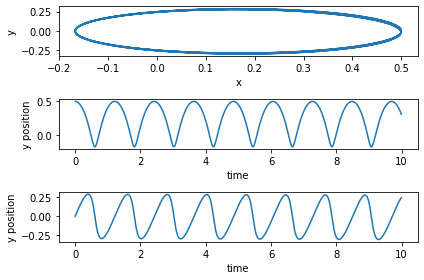

[-1.5        -1.49999996 -1.49999984 -1.49999964 -1.49999935 -1.49999898
 -1.49999853 -1.49999798 -1.49999734 -1.49999659 -1.49999574 -1.49999478
 -1.49999369 -1.49999247 -1.49999112 -1.49998961 -1.49998794 -1.49998609
 -1.49998404 -1.49998178 -1.49997929 -1.49997654 -1.49997351 -1.49997017
 -1.49996649 -1.49996243 -1.49995796 -1.49995304 -1.49994762 -1.49994165
 -1.49993508 -1.49992786 -1.49991994 -1.49991127 -1.4999018  -1.49989151
 -1.49988041 -1.49986852 -1.49985595 -1.49984292 -1.49982978 -1.49981712
 -1.49980588 -1.49979754 -1.49979431 -1.49979958 -1.4998184  -1.4998583
 -1.49993028 -1.50005034 -1.50024115 -1.500534   -1.50097003 -1.50159939
 -1.50247522 -1.50363822 -1.5050881  -1.50674417 -1.50841251 -1.50979454
 -1.51056842 -1.5105255  -1.50967788 -1.5082518  -1.50657253 -1.50493047
 -1.50350752 -1.50237442 -1.50152565 -1.50091821 -1.50049876 -1.50021789
 -1.50003547 -1.49992116 -1.49985304 -1.4998157  -1.49979853 -1.49979431
 -1.49979819 -1.49980692 -1.49981835 -1.49983109 -1.

In [12]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

DeltaT = 0.01
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
E = np.zeros(n)
# Constants of the model
m = 1.0   # mass, you can change these
alpha = 1.0
# Initial conditions as compact 2-dimensional arrays
x0 = 0.5; y0= 0.
r0 = np.array([x0,y0]) 
v0 = np.array([0.0,1.0])
r[0] = r0
v[0] = v0
rabs = sqrt(sum(r[0]*r[0]))
E[0] = 0.5*m*(v[0,0]**2+v[0,1]**2)-alpha/rabs
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -alpha*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -alpha*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    E[i+1] = 0.5*m*(v[i+1,0]**2+v[i+1,1]**2)-alpha/rabs
    t[i+1] = t[i] + DeltaT
# Plot position as function of time
fig, ax = plt.subplots(3,1)
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[0].plot(r[:,0],r[:,1])
ax[1].set_xlabel('time')
ax[1].set_ylabel('y position')
ax[1].plot(t,r[:,0])
ax[2].set_xlabel('time')
ax[2].set_ylabel('y position')
ax[2].plot(t,r[:,1])

fig.tight_layout()
save_fig("2DimGravity")
plt.show()
print(E)

## Different Potential

Let us now try another potential, given by

$$
V(r) = \beta r,
$$

where $\beta$ is constant we assume is larger than zero. This type of potential has played an importan role in modeling confinement of quarks in non-relativistic models for the interactions among quarks, see for example <https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.44.1369> 


Adding the angular momentum part, we obtain the effective potential

$$
V_{\mathrm{eff}}(r) = \beta r+\frac{L^2}{2\mu r^2},
$$

and taking the derivative with respect to $r$, we get the radial force

$$
F_r=-\frac{dV_{\mathrm{eff}}(r)}{dr} = -\beta+\frac{L^2}{\mu r^3}.
$$

It gives us in turn a radial acceleration $a_r$

$$
a_r= -\frac{\beta}{\mu}+\frac{L^2}{\mu^2 r^3}.
$$

This is the equation we need to include in our code. I have not been able to find out if there is an analytical solution to the above equation. If you can find one, there is a reward of $50$ USD to the first one who finds. Numerically life is very easy, we just define a new acceleration, as seen below.

## Plotting the Effective Potential

First however, we plot the effective potential in order to get a feeling of what we may expect.

The following code plots this effective potential for a simple choice of parameters, with a potential $\beta r $. Here we have chosen $L=m=\beta=1$.

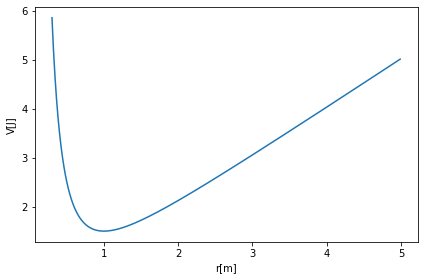

In [13]:
# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.3
xfinal = 5.0
beta = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = beta*x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

## Finding the Minimum for Circular Orbits

We take now the derivative of the effective potential in order to find its minimum, that is

$$
\frac{dV_{\mathrm{eff}}(r)}{dr} = \beta-\frac{L^2}{\mu r^3}=0,
$$

which gives us $r_{\mathrm{min}}$

$$
r_{\mathrm{min}}=\left [\frac{L^2}{\beta \mu}\right ]^{1/3}.
$$

With the above choice of parameters this gives $r_{\mathrm{min}}=1$. 

In the code here we solve the equations of motion and find the time-evolution of the radius $r$.


## Numerical Studies

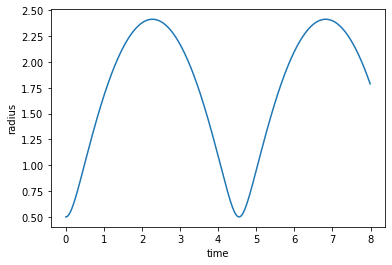

In [8]:
DeltaT = 0.01
#set up arrays 
tfinal = 8.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
beta = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/beta)**(1./3.)
# Initial conditions, place yourself at the potential min
r0 = 0.5*rmin
v0 = 0.0  # starts at rest
r[0] = r0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -beta/m+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -beta/m+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
#plotting
plt.xlabel('time')
plt.ylabel('radius')
plt.plot(t,r)
save_fig("LinearPotential")
plt.show()

We see that if we run with the initial condition corresponding to a circular orbit, our radius stays constant as function of time. 



## Scattering and Cross Sections

Scattering experiments don't measure entire trajectories. For elastic
collisions, they measure the distribution of final scattering angles
at best. Most experiments use targets thin enough so that the number
of scatterings is typically zero or one. The cross section, $\sigma$,
describes the cross-sectional area for particles to scatter with an
individual target atom or nucleus. Cross section measurements form the
basis for MANY fields of physics. BThe cross section, and the
differential cross section, encapsulates everything measurable for a
collision where all that is measured is the final state, e.g. the
outgoing particle had momentum $\boldsymbol{p}_f$. y studying cross sections,
one can infer information about the potential interaction between the
two particles. Inferring, or constraining, the potential from the
cross section is a classic {\it inverse} problem. Collisions are
either elastic or inelastic. Elastic collisions are those for which
the two bodies are in the same internal state before and after the
collision. If the collision excites one of the participants into a
higher state, or transforms the particles into different species, or
creates additional particles, the collision is inelastic. Here, we
consider only elastic collisions.

## Scattering: Coulomb forces

For Coulomb forces, the cross section is infinite because the range of
the Coulomb force is infinite, but for interactions such as the strong
interaction in nuclear or particle physics, there is no long-range
force and cross-sections are finite. Even for Coulomb forces, the part
of the cross section that corresponds to a specific scattering angle,
$d\sigma/d\Omega$, which is a function of the scattering angle
$\theta_s$ is still finite.

If a particle travels through a thin target, the chance the particle
scatters is $P_{\rm scatt}=\sigma dN/dA$, where $dN/dA$ is the number
of scattering centers per area the particle encounters. If the density
of the target is $\rho$ particles per volume, and if the thickness of
the target is $t$, the areal density (number of target scatterers per
area) is $dN/dA=\rho t$. Because one wishes to quantify the collisions
independently of the target, experimentalists measure scattering
probabilities, then divide by the areal density to obtain
cross-sections,

$$
\begin{eqnarray}
\sigma=\frac{P_{\rm scatt}}{dN/dA}.
\end{eqnarray}
$$

## Scattering, more details

Instead of merely stating that a particle collided, one can measure
the probability the particle scattered by a given angle. The
scattering angle $\theta_s$ is defined so that at zero the particle is
unscattered and at $\theta_s=\pi$ the particle is scattered directly
backward. Scattering angles are often described in the center-of-mass
frame, but that is a detail we will neglect for this first discussion,
where we will consider the scattering of particles moving classically
under the influence of fixed potentials $U(\boldsymbol{r})$. Because the
distribution of scattering angles can be measured, one expresses the
differential cross section,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\frac{d^2\sigma}{d\cos\theta_s~d\phi}.
\label{_auto1} \tag{1}
\end{equation}
$$

Usually, the literature expresses differential cross sections as

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
d\sigma/d\Omega=\frac{d\sigma}{d\cos\theta d\phi}=\frac{1}{2\pi}\frac{d\sigma}{d\cos\theta},
\label{_auto2} \tag{2}
\end{equation}
$$

where the last equivalency is true when the scattering does not depend
on the azimuthal angle $\phi$, as is the case for spherically
symmetric potentials.

The differential solid angle $d\Omega$ can be thought of as the area
subtended by a measurement, $dA_d$, divided by $r^2$, where $r$ is the
distance to the detector,

$$
\begin{eqnarray}
dA_d=r^2 d\Omega.
\end{eqnarray}
$$

With this definition $d\sigma/d\Omega$ is independent of the distance
from which one places the detector, or the size of the detector (as
long as it is small).


## Differential scattering cross sections

Differential scattering cross sections are calculated by assuming a
random distribution of impact parameters $b$. These represent the
distance in the $xy$ plane for particles moving in the $z$ direction
relative to the scattering center. An impact parameter $b=0$ refers to
being aimed directly at the target's center. The impact parameter
describes the transverse distance from the $z=0$ axis for the
trajectory when it is still far away from the scattering center and
has not yet passed it. The differential cross section can be expressed
in terms of the impact parameter,

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
d\sigma=2\pi bdb,
\label{_auto3} \tag{3}
\end{equation}
$$

which is the area of a thin ring of radius $b$ and thickness $db$. In
classical physics, one can calculate the trajectory given the incoming
kinetic energy $E$ and the impact parameter if one knows the mass and
potential.


## More on Differential  Cross Sections

From the trajectory, one then finds the scattering angle
$\theta_s(b)$. The differential cross section is then

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\frac{d\sigma}{d\Omega}=\frac{1}{2\pi}\frac{d\sigma}{d\cos\theta_s}=b\frac{db}{d\cos\theta_s}=\frac{b}{(d/db)\cos\theta_s(b)}.
\label{_auto4} \tag{4}
\end{equation}
$$

Typically, one would calculate $\cos\theta_s$ and $(d/db)\cos\theta_s$
as functions of $b$. This is sufficient to plot the differential cross
section as a function of $\theta_s$.

The total cross section is

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
\sigma_{\rm tot}=\int d\Omega\frac{d\sigma}{d\Omega}=2\pi\int d\cos\theta_s~\frac{d\sigma}{d\Omega}. 
\label{_auto5} \tag{5}
\end{equation}
$$

Even if the total cross section is infinite, e.g. Coulomb forces, one
can still have a finite differential cross section as we will see
later on.


## Rutherford Scattering

This refers to the calculation of $d\sigma/d\Omega$ due to an inverse
square force, $F_{12}=\pm\alpha/r^2$ for repulsive/attractive
interaction. Rutherford compared the scattering of $\alpha$ particles
($^4$He nuclei) off of a nucleus and found the scattering angle at
which the formula began to fail. This corresponded to the impact
parameter for which the trajectories would strike the nucleus. This
provided the first measure of the size of the atomic nucleus. At the
time, the distribution of the positive charge (the protons) was
considered to be just as spread out amongst the atomic volume as the
electrons. After Rutherford's experiment, it was clear that the radius
of the nucleus tended to be roughly 4 orders of magnitude smaller than
that of the atom, which is less than the size of a football relative
to Spartan Stadium.


## Rutherford Scattering, more details



In order to calculate differential cross section, we must find how the
impact parameter is related to the scattering angle. This requires
analysis of the trajectory. We consider our previous expression for
the trajectory where we derived the elliptic form for the trajectory,
For that case we considered an attractive
force with the particle's energy being negative, i.e. it was
bound. However, the same form will work for positive energy, and
repulsive forces can be considered by simple flipping the sign of
$\alpha$. For positive energies, the trajectories will be hyperbolas,
rather than ellipses, with the asymptotes of the trajectories
representing the directions of the incoming and outgoing
tracks.

## Rutherford Scattering, final trajectories


We have

<!-- Equation labels as ordinary links -->
<div id="eq:ruthtraj"></div>

$$
\begin{equation}\label{eq:ruthtraj} \tag{6}
r=\frac{1}{\frac{m\alpha}{L^2}+A\cos\theta}.
\end{equation}
$$

Once $A$ is large enough, which will happen when the energy is
positive, the denominator will become negative for a range of
$\theta$. This is because the scattered particle will never reach
certain angles. The asymptotic angles $\theta'$ are those for which
the denominator goes to zero,

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\cos\theta'=-\frac{m\alpha}{AL^2}.
\label{_auto6} \tag{7}
\end{equation}
$$

## Rutherford Scattering, Closest Approach



The trajectory's point of closest approach is at $\theta=0$ and the
two angles $\theta'$, which have this value of $\cos\theta'$, are the
angles of the incoming and outgoing particles. From
Fig (**to come**), one can see that the scattering angle
$\theta_s$ is given by,

<!-- Equation labels as ordinary links -->
<div id="eq:sthetover2"></div>

$$
\begin{eqnarray}
\label{eq:sthetover2} \tag{8}
2\theta'-\pi&=&\theta_s,~~~\theta'=\frac{\pi}{2}+\frac{\theta_s}{2},\\
\nonumber
\sin(\theta_s/2)&=&-\cos\theta'\\
\nonumber
&=&\frac{m\alpha}{AL^2}.
\end{eqnarray}
$$

Now that we have $\theta_s$ in terms of $m,\alpha,L$ and $A$, we wish
to re-express $L$ and $A$ in terms of the impact parameter $b$ and the
energy $E$. This will set us up to calculate the differential cross
section, which requires knowing $db/d\theta_s$. It is easy to write
the angular momentum as

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
L^2=p_0^2b^2=2mEb^2.
\label{_auto7} \tag{9}
\end{equation}
$$

## Rutherford Scattering, getting there


Finding $A$ is more complicated. To accomplish this we realize that
the point of closest approach occurs at $\theta=0$, so from
Eq. ([6](#eq:ruthtraj))

<!-- Equation labels as ordinary links -->
<div id="eq:rminofA"></div>

$$
\begin{eqnarray}
\label{eq:rminofA} \tag{10}
\frac{1}{r_{\rm min}}&=&\frac{m\alpha}{L^2}+A,\\
\nonumber
A&=&\frac{1}{r_{\rm min}}-\frac{m\alpha}{L^2}.
\end{eqnarray}
$$

Next, $r_{\rm min}$ can be found in terms of the energy because at the
point of closest approach the kinetic energy is due purely to the
motion perpendicular to $\hat{r}$ and

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
E=-\frac{\alpha}{r_{\rm min}}+\frac{L^2}{2mr_{\rm min}^2}.
\label{_auto8} \tag{11}
\end{equation}
$$

## Rutherford Scattering, More Manipulations

One can solve the quadratic equation for $1/r_{\rm min}$,

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
\frac{1}{r_{\rm min}}=\frac{m\alpha}{L^2}+\sqrt{(m\alpha/L^2)^2+2mE/L^2}.
\label{_auto9} \tag{12}
\end{equation}
$$

We can plug the expression for $r_{\rm min}$ into the expression for $A$, Eq. ([10](#eq:rminofA)),

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
A=\sqrt{(m\alpha/L^2)^2+2mE/L^2}=\sqrt{(\alpha^2/(4E^2b^4)+1/b^2}
\label{_auto10} \tag{13}
\end{equation}
$$

## Rutherford Scattering, final expression

Finally, we insert the expression for $A$ into that for the scattering angle, Eq. ([8](#eq:sthetover2)),

<!-- Equation labels as ordinary links -->
<div id="eq:scattangle"></div>

$$
\begin{eqnarray}
\label{eq:scattangle} \tag{14}
\sin(\theta_s/2)&=&\frac{m\alpha}{AL^2}\\
\nonumber
&=&\frac{a}{\sqrt{a^2+b^2}}, ~~a\equiv \frac{\alpha}{2E}
\end{eqnarray}
$$

## Rutherford Scattering, the Differential Cross Section



The differential cross section can now be found by differentiating the
expression for $\theta_s$ with $b$,

<!-- Equation labels as ordinary links -->
<div id="eq:rutherford"></div>

$$
\begin{eqnarray}
\label{eq:rutherford} \tag{15}
\frac{1}{2}\cos(\theta_s/2)d\theta_s&=&\frac{ab~db}{(a^2+b^2)^{3/2}}=\frac{bdb}{a^2}\sin^3(\theta_s/2),\\
\nonumber
d\sigma&=&2\pi bdb=\frac{\pi a^2}{\sin^3(\theta_s/2)}\cos(\theta_s/2)d\theta_s\\
\nonumber
&=&\frac{\pi a^2}{2\sin^4(\theta_s/2)}\sin\theta_s d\theta_s\\
\nonumber
\frac{d\sigma}{d\cos\theta_s}&=&\frac{\pi a^2}{2\sin^4(\theta_s/2)},\\
\nonumber
\frac{d\sigma}{d\Omega}&=&\frac{a^2}{4\sin^4(\theta_s/2)}.
\end{eqnarray}
$$

where $a= \alpha/2E$. This the Rutherford formula for the differential
cross section. It diverges as $\theta_s\rightarrow 0$ because
scatterings with arbitrarily large impact parameters still scatter to
arbitrarily small scattering angles. The expression for
$d\sigma/d\Omega$ is the same whether the interaction is positive or
negative.


## Rutherford Scattering, Example


Consider a particle of mass $m$ and charge $z$ with kinetic energy $E$
(Let it be the center-of-mass energy) incident on a heavy nucleus of
mass $M$ and charge $Z$ and radius $R$. We want to find the angle at which the
Rutherford scattering formula breaks down.

Let $\alpha=Zze^2/(4\pi\epsilon_0)$. The scattering angle in Eq. ([14](#eq:scattangle)) is

$$
\sin(\theta_s/2)=\frac{a}{\sqrt{a^2+b^2}}, ~~a\equiv \frac{\alpha}{2E}.
$$

The impact parameter $b$ for which the point of closest approach
equals $R$ can be found by using angular momentum conservation,

$$
\begin{eqnarray*}
p_0b&=&b\sqrt{2mE}=Rp_f=R\sqrt{2m(E-\alpha/R)},\\
b&=&R\frac{\sqrt{2m(E-\alpha/R)}}{\sqrt{2mE}}\\
&=&R\sqrt{1-\frac{\alpha}{ER}}.
\end{eqnarray*}
$$

## Rutherford Scattering, Example, wrapping up



Putting these together

$$
\theta_s=2\sin^{-1}\left\{
\frac{a}{\sqrt{a^2+R^2(1-\alpha/(RE))}}
\right\},~~~a=\frac{\alpha}{2E}.
$$

It was from this departure of the experimentally measured
$d\sigma/d\Omega$ from the Rutherford formula that allowed Rutherford
to infer the radius of the gold nucleus, $R$.



## Variational Calculus

The calculus of variations involves 
problems where the quantity to be minimized or maximized is an integral. 


The usual minimization problem one faces involves taking a function
${\cal L}(x)$, then finding the single value $x$ for which ${\cal L}$
is either a maximum or minimum. In multivariate calculus one also
learns to solve problems where you minimize for multiple variables,
${\cal L}(x_1,x_2,\cdots x_n)$, and finding the points $(x_1\cdots
y_n)$ in an $n$-dimensional space that maximize or minimize the
function. Here, we consider what seems to be a much more ambitious
problem. Imagine you have a function ${\cal L}(x(t),\dot{x}(t),t)$,
and you wish to find the extrema for an infinite number of values of
$x$, i.e. $x$ at each point $t$. The function ${\cal L}$ will not only
depend on $x$ at each point $t$, but also on the slope at each point,
plus an additional dependence on $t$. Note we are NOT finding an
optimum value of $t$, we are finding the set of optimum values of $x$
at each point $t$, or equivalently, finding the function $x(t)$.


## Variational Calculus, introducing the action

One treats the function $x(t)$ as being unknown while minimizing the action

$$
S=\int_{t_1}^{t_2}dt~{\cal L}(x(t),\dot{x}(t),t).
$$

Thus, we are minimizing $S$ with respect to an infinite number of
values of $x(t_i)$ at points $t_i$. As an additional criteria, we will
assume that $x(t_1)$ and $x(t_2)$ are fixed, and that that we will
only consider variations of $x$ between the boundaries. The dependence
on the derivative, $\dot{x}=dx/dt$, is crucial because otherwise the
solution would involve simply finding the one value of $x$ that
minimized ${\cal L}$, and $x(t)$ would equal a constant if there were no
explicit $t$ dependence. Furthermore, $x$ wouldn't need to be
continuous at the boundary.


## Variational Calculus, general Action


In the general case we have an integral of the type

$$
S[q]= \int_{t_1}^{t_2} {\cal L}(q(t),\dot{q}(t),t)dt,
$$

where $S$ is the quantity which is sought minimized or maximized.  The
problem is that although ${\cal L}$  is a function of the general variables
$q(t),\dot{q}(t),t$ (note our change of variables), the exact dependence of $q$ on $t$ is not known.
This means again that even though the integral has fixed limits $t_1$
and $t_2$, the path of integration is not known. In our case the unknown
quantities are the positions and general velocities of a given number
of objects and we wish to choose an integration path which makes the
functional $S[q]$ stationary. This means that we want to find minima,
or maxima or saddle points. In physics we search normally for minima.
Our task is therefore to find the minimum of $S[q]$ so that its
variation $\delta S$ is zero subject to specific constraints.  The
constraints can be treated via the technique of Lagrangian multipliers
as we will see below.


## Variational Calculus, Optimal Path


We assume the existence of an optimum path, that is a path for which
$S[q]$ is stationary. There are infinitely many such paths.  The
difference between two paths $\delta q$ is called the variation of
$q$.

We call the variation $\eta(t)$ and it is scaled by a factor $\alpha$.
The function $\eta(t)$ is arbitrary except for

$$
\eta(t_1)=\eta(t_2)=0,
$$

and we assume that we can model the change in $q$ as

$$
q(t,\alpha) = q(t)+\alpha\eta(t),
$$

and

$$
\delta q = q(t,\alpha) -q(t,0)=\alpha\eta(t).
$$

## Variational Calculus, Condition for an Extreme Value


We choose $q(t,\alpha=0)$ as the unkonwn path  that will minimize $S$.  The value
$q(t,\alpha\ne 0)$  describes a neighbouring path.

We have

$$
S[q(\alpha)]= \int_{t_1}^{t_2} {\cal L}(q(t,\alpha),\dot{q}(t,\alpha),t)dt.
$$

The condition for an extreme of

$$
S[q(\alpha)]= \int_{t_1}^{t_2} {\cal L}(q(t,\alpha),\dot{q}(t,\alpha),t)dt,
$$

is

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial t}\right]_{\alpha=0} =0.
$$

## Variational Calculus. $\alpha$ Dependence


The $\alpha$ dependence is contained in $q(t,\alpha)$ and $\dot{q}(t,\alpha)$ meaning that

$$
\left[\frac{\partial  E[q(\alpha)]}{\partial \alpha}\right]=\int_{t_1}^{t_2} \left( \frac{\partial {\cal l}}{\partial q}\frac{\partial q}{\partial \alpha}+\frac{\partial {\cal L}}{\partial \dot{q}}\frac{\partial \dot{q}}{\partial \alpha}\right)dt.
$$

We have defined

$$
\frac{\partial q(x,\alpha)}{\partial \alpha}=\eta(x)
$$

and thereby

$$
\frac{\partial \dot{q}(t,\alpha)}{\partial \alpha}=\frac{d(\eta(t))}{dt}.
$$

## INtegrating by Parts

Using

$$
\frac{\partial q(t,\alpha)}{\partial \alpha}=\eta(t),
$$

and

$$
\frac{\partial \dot{q}(t,\alpha)}{\partial \alpha}=\frac{d(\eta(t))}{dt},
$$

in the integral gives

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial \alpha}\right]=\int_{t_1}^{t_2} \left( \frac{\partial {\cal L}}{\partial q}\eta(t)+\frac{\partial {\cal L}}{\partial \dot{q}}\frac{d(\eta(t))}{dt}\right)dt.
$$

Integrating the second term by parts

$$
\int_{t_1}^{t_2} \frac{\partial {\cal L}}{\partial \dot{q}}\frac{d(\eta(t))}{dt}dt =\eta(t)\frac{\partial {\cal L}}{\partial \dot{q}}|_{t_1}^{t_2}-
\int_a^b \eta(t)\frac{d}{dx}\frac{\partial {\cal L}}{\partial \dot{q}}dt,
$$

and since the first term dissappears due to $\eta(a)=\eta(b)=0$, we obtain

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial \alpha}\right]=\int_{t_1}^{t_2} \left( \frac{\partial {\cal L}}{\partial q}-\frac{d}{dx}\frac{\partial {\cal L}}{\partial \dot{q}}
\right)\eta(t)dt=0.
$$

## Euler-Lagrange Equations


The latter can be written as

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial \alpha}\right]_{\alpha=0}=\int_{t_1}^{t_2} \left( \frac{\partial {\cal L}}{\partial q}-\frac{d}{\
dx}\frac{\partial {\cal L}}{\partial \dot{q}}\right)\delta q(t)dt=\delta S = 0.
$$

The condition for a stationary value is thus a partial differential equation

$$
\frac{\partial {\cal L}}{\partial q}-\frac{d}{dx}\frac{\partial {\cal L}}{\partial \dot{q}}=0,
$$

known as the **Euler-Lagrange** equation.